In [3]:
import pandas as pd
import sys,os
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FuncFormatter
%matplotlib inline
os.getcwd()

'/Users/evolutioneco/coverage_per_site'

In [4]:
def GetFileList(path='/Users/evolutioneco/coverage_per_site'):
    dir_list = os.listdir(path)
    os.listdir()
    new_dir_list = []
    for i in dir_list:
        if i.endswith('male'):
            new_dir_list.append(i.split('.')[0])
    new_dir_list = set(new_dir_list)
    return new_dir_list

In [5]:
GetFileList()

{'E12439', 'E15023', 'E5754', 'bc', 'fe', 'ol', 'si'}

In [6]:
def readFL(name):
    '''
    01. read file
    '''
    female = pd.read_csv(name + '.bed.female', sep='\t', header=None,
           names=['Chr','Pos','Depth'])
    male = pd.read_csv(name + '.bed.male', sep='\t', header=None,
           names=['Chr','Pos','Depth'])
    CHR = []
    POS = []
    Male_Depth = []
    Female_Depth = []
    M_F_Ratio = []
    for i in male.Pos:
        #print(i)
        if i in list(female.Pos):
            f_num = list(male.Pos).index(i)
            m_num = list(female.Pos).index(i)
            CHR.append(male.Chr[f_num])
            POS.append(male.Pos[f_num])
            Male_Depth.append(male.Depth[f_num])
            Female_Depth.append(female.Depth[m_num])
            M_F_Ratio.append(male.Depth[f_num]/female.Depth[m_num])
        else:
            pass
    #m2f_df = pd.DataFrame({'Chr':CHR,'Pos':POS,'M:F Depth':M_F_Ratio})
    m2f_df = pd.DataFrame({'Chr':CHR,'Pos':POS,'M:F Depth':M_F_Ratio}).rolling(window=10).mean()
    return m2f_df

In [7]:
def getaxvspan(file):
    '''
    02.get shade boundaries.
    '''
    starts = []
    ends = []
    with open(file,'r') as inf:
        for line in inf:
            if line.startswith("#"):
                CHR,ensemble,Type, start, end, *_ = line.split('\t')
                starts.append(start)
                ends.append(end)
            else:
                pass
    return starts, ends

In [8]:
os.getcwd()

'/Users/evolutioneco/coverage_per_site'

In [9]:
def ReadFST(prefix):
    '''
    FST
    '''
    os.chdir('/Users/evolutioneco/Project/1.guppy_fst/test/')
    fst = pd.read_csv(prefix+'.weir.fst', sep = '\t')
    male_coverage = pd.read_csv('male.'+ prefix +'.ldepth', sep = '\t')
    female_coverage = pd.read_csv('female.'+ prefix +'.ldepth', sep = '\t')
    # pd.DataFrame({'Chr':CHR,'Pos':POS,'M:F Depth':M_F_Ratio})
    Fst_coverage = pd.DataFrame({'CHR':fst.CHROM,
                                'POS':fst.POS,
                                'FST':fst.WEIR_AND_COCKERHAM_FST,
                                'MF_Depth':male_coverage.SUM_DEPTH/female_coverage.SUM_DEPTH/1.18})
    return Fst_coverage

In [29]:
starts0, ends0 = getaxvspan("/Users/evolutioneco/coverage_per_site/Olr1496.cds.gff3")
starts1, ends1 = getaxvspan("/Users/evolutioneco/coverage_per_site/si:rp71-17i16.5.cds.gff3")
starts2, ends2 = getaxvspan("/Users/evolutioneco/coverage_per_site/Bcl11a.gff3")
starts3, ends3 = getaxvspan("/Users/evolutioneco/coverage_per_site/fezf1.cds.gff3")
starts4, ends4 = getaxvspan("/Users/evolutioneco/coverage_per_site/ENSPREG05754.gff3")
starts5, ends5 = getaxvspan("/Users/evolutioneco/coverage_per_site/ENSPREG15023.gff3")
starts6, ends6 = getaxvspan("/Users/evolutioneco/coverage_per_site/ENSPREG12439.gff3")

In [11]:
# read the file for a specific gene
# 'E12439', 'E15023', 'E5754', 'bc', 'fe', 'ol', 'si'
os.chdir('/Users/evolutioneco/coverage_per_site/')
df1 = readFL('ol')

In [12]:
df2 = readFL('si')

In [13]:
df3 = readFL('bc')

In [14]:
df4 = readFL('fe')

In [15]:
df5 = readFL('E5754')

In [16]:
df6 = readFL('E15023')

In [17]:
df7 = readFL('E12439')

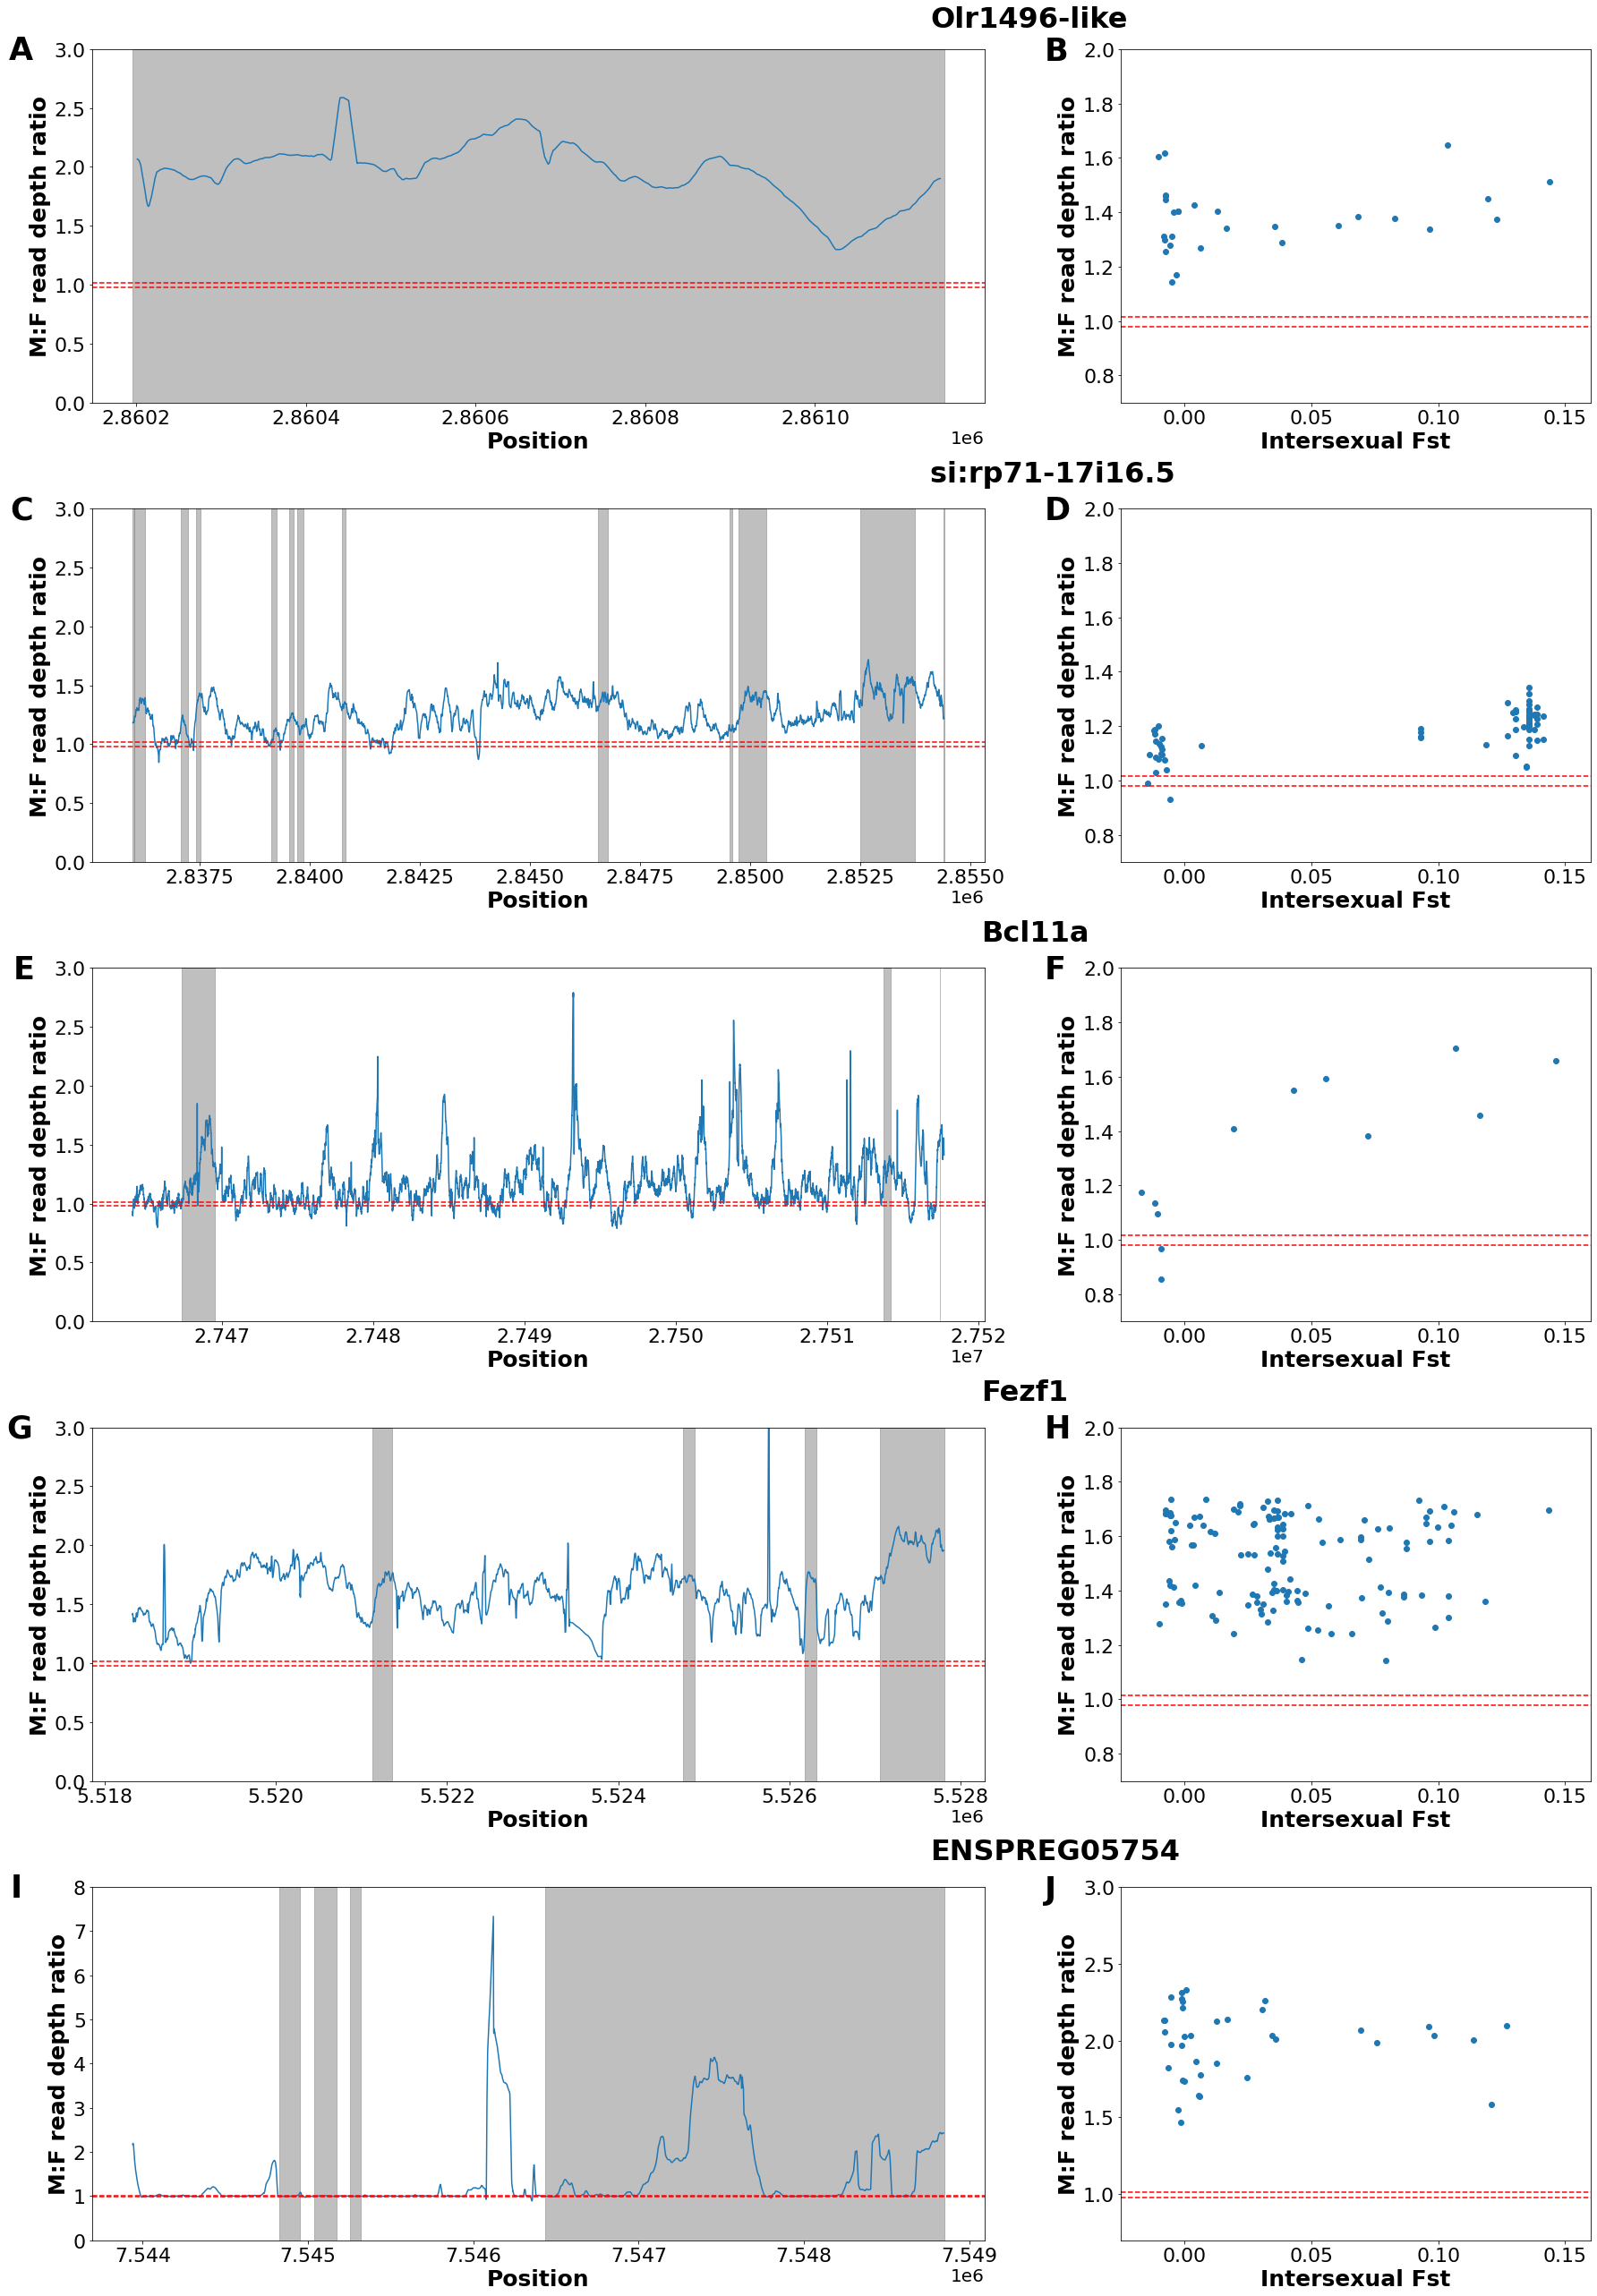

In [30]:
figs, axs = plt.subplots(5,2,gridspec_kw={'width_ratios': [3.8, 2]})
#figs.tight_layout(pad=0.1, w_pad=0.5, h_pad=1.0) 
# change the figure size for all subplots
#figs.set_xtick(fontsize=12)
#figs.tick_params(axis='both', which='major', labelsize=15)
matplotlib.rc('xtick', labelsize=20) 
figs.set_figheight(50)
figs.set_figwidth(30)
figs.subplots_adjust(left=0.125,
                    bottom=0.2, hspace=0.3) 
#                    right=0.9, 
#                    top=0.9, 
#                    wspace=0.5, 
#                    hspace=0.2)

################# fig1 #####################
axs[0,0].plot(df1['Pos'],df1["M:F Depth"]) # moving average
#axs[0,0].set_title('Olr1496-like')
axs[0,0].set_ylim(0,3)
axs[0,0].set_xlabel('Position', fontsize=25, fontweight='bold')
axs[0,0].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[0,0].tick_params(axis='both', which='major', labelsize=22)
axs[0,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[0,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts0)-1):
    axs[0,0].axvspan(int(starts0[i]),int(ends0[i]), alpha = 0.5, color= 'grey')
axs[0,0].axvspan(int(starts0[-1]),int(ends0[-1]), alpha = 0.5, color= 'grey')   

################# fig2 #####################
axs[1,0].plot(df2['Pos'],df2["M:F Depth"]) # moving average
#axs[1,0].set_title('si:rp71-17i16.5')
axs[1,0].set_ylim(0,3)
axs[1,0].set_xlabel('Position', fontsize=25, fontweight='bold')
axs[1,0].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[1,0].tick_params(axis='both', which='major', labelsize=22)
axs[1,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[1,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts1)-1):
    axs[1,0].axvspan(int(starts1[i]),int(ends1[i]), alpha = 0.5, color= 'grey')
axs[1,0].axvspan(int(starts1[-1])+50,int(ends1[-1]), alpha = 0.5, color= 'grey')  

################# fig3 #####################
axs[2,0].plot(df3['Pos'],df3["M:F Depth"]) # moving average
#axs[2,0].set_title('si:rp71-17i16.5')
axs[2,0].set_ylim(0,3)
axs[2,0].set_xlabel('Position', fontsize=25, fontweight='bold')
axs[2,0].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[2,0].tick_params(axis='both', which='major', labelsize=22)
axs[2,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[2,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts2)-1):
    axs[2,0].axvspan(int(starts2[i]),int(ends2[i]), alpha = 0.5, color= 'grey')
axs[2,0].axvspan(int(starts2[-1])+50,int(ends2[-1]), alpha = 0.5, color= 'grey')   

################# fig4 #####################
axs[3,0].plot(df4['Pos'],df4["M:F Depth"]) # moving average
#axs[3,0].set_title('si:rp71-17i16.5')
axs[3,0].set_ylim(0,3)
axs[3,0].set_xlabel('Position', fontsize=25, fontweight='bold')
axs[3,0].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[3,0].tick_params(axis='both', which='major', labelsize=22)
axs[3,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[3,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts3)-1):
    axs[3,0].axvspan(int(starts3[i]),int(ends3[i]), alpha = 0.5, color= 'grey')
axs[3,0].axvspan(int(starts3[-1])+50,int(ends3[-1]), alpha = 0.5, color= 'grey')  

################# fig5 #####################
axs[4,0].plot(df5['Pos'],df5["M:F Depth"]) # moving average
#axs[4,0].set_title('si:rp71-17i16.5')
axs[4,0].set_ylim(0,8)
axs[4,0].set_xlabel('Position', fontsize=25, fontweight='bold')
axs[4,0].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[4,0].tick_params(axis='both', which='major', labelsize=22)
axs[4,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[4,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts3)-1):
    axs[4,0].axvspan(int(starts4[i]),int(ends4[i]), alpha = 0.5, color= 'grey')
axs[4,0].axvspan(int(starts4[-1])+50,int(ends4[-1]), alpha = 0.5, color= 'grey')  




##################################
########## FST PLOTS #############
##################################


########### Fig 1 ################
fst_df1 = ReadFST('Olr1496-like')
axs[0,1].scatter(fst_df1.FST, fst_df1.MF_Depth)
#axs[0,1].set_title('si:rp71-17i16.5')
axs[0,1].set_xlabel('Intersexual Fst', fontsize=25, fontweight='bold')
axs[0,1].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[0,1].set_ylim(0.7,2)
axs[0,1].set_xlim(-0.025,0.16)
axs[0,1].tick_params(axis='both', which='major', labelsize=22)
axs[0,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[0,1].axhline(y=1.015249, color='r', linestyle='--')
########### Fig 2 ################
fst_df2 = ReadFST('si:rp71-17i16.5')
axs[1,1].scatter(fst_df2.FST, fst_df2.MF_Depth)
#axs[0,1].set_title('si:rp71-17i16.5')
axs[1,1].set_xlabel('Intersexual Fst', fontsize=25, fontweight='bold')
axs[1,1].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[1,1].set_ylim(0.7,2)
axs[1,1].set_xlim(-0.025,0.16)
axs[1,1].tick_params(axis='both', which='major', labelsize=22)
axs[1,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[1,1].axhline(y=1.015249, color='r', linestyle='--')
########### Fig 3 ################
fst_df3 = ReadFST('Bcl11a')
axs[2,1].scatter(fst_df3.FST, fst_df3.MF_Depth)
#axs[0,1].set_title('si:rp71-17i16.5')
axs[2,1].set_xlabel('Intersexual Fst', fontsize=25, fontweight='bold')
axs[2,1].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[2,1].set_ylim(0.7,2)
axs[2,1].set_xlim(-0.025,0.16)
axs[2,1].tick_params(axis='both', which='major', labelsize=22)
axs[2,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[2,1].axhline(y=1.015249, color='r', linestyle='--')

########### Fig 4 ################
fst_df4 = ReadFST('Fezf1')
axs[3,1].scatter(fst_df4.FST, fst_df4.MF_Depth)
#axs[0,1].set_title('si:rp71-17i16.5')
axs[3,1].set_xlabel('Intersexual Fst', fontsize=25, fontweight='bold')
axs[3,1].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[3,1].set_ylim(0.7,2)
axs[3,1].set_xlim(-0.025,0.16)
axs[3,1].tick_params(axis='both', which='major', labelsize=22)
axs[3,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[3,1].axhline(y=1.015249, color='r', linestyle='--')
########### Fig 5 ################
fst_df5 = ReadFST('ENSPREG05754')
axs[4,1].scatter(fst_df5.FST, fst_df5.MF_Depth)
#axs[0,1].set_title('si:rp71-17i16.5')
axs[4,1].set_xlabel('Intersexual Fst', fontsize=25,fontweight='bold')
axs[4,1].set_ylabel('M:F read depth ratio', fontsize=25,fontweight='bold')
axs[4,1].set_ylim(0.7,3)
axs[4,1].set_xlim(-0.025,0.16)
axs[4,1].tick_params(axis='both', which='major', labelsize=22)
axs[4,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[4,1].axhline(y=1.015249, color='r', linestyle='--')



#for ax in axs.flat:
#    ax.set(ylabel='M:F read depth ratio', fontsize=15)
    
# 添加标签
axs[0,0].text(2860050,3.12, "A",fontsize=35, fontweight='bold', va='top')
axs[0,1].text(-0.055,2.05, "B",fontsize=35, fontweight='bold', va='top')
axs[1,0].text(2833200,3.12, "C",fontsize=35, fontweight='bold', va='top')
axs[1,1].text(-0.055,2.05, "D",fontsize=35, fontweight='bold', va='top')
axs[2,0].text(27456200,3.12, "E",fontsize=35, fontweight='bold', va='top')
axs[2,1].text(-0.055,2.05, "F",fontsize=35, fontweight='bold', va='top')
axs[3,0].text(5516850,3.12, "G",fontsize=35, fontweight='bold', va='top')
axs[3,1].text(-0.055,2.05, "H",fontsize=35, fontweight='bold', va='top')
axs[4,0].text(7543200,8.32, "I",fontsize=35, fontweight='bold', va='top')
axs[4,1].text(-0.055,3.08, "J",fontsize=35, fontweight='bold', va='top')

axs[0,1].text(-0.10,2.160, "Olr1496-like",fontsize=32, fontweight='bold', va='top')
axs[1,1].text(-0.10,2.10, "si:rp71-17i16.5 ",fontsize=32, fontweight='bold', ma='center')
axs[2,1].text(-0.080,2.10, "Bcl11a",fontsize=32, fontweight='bold', ma='center')
axs[3,1].text(-0.080,2.10, "Fezf1",fontsize=32, fontweight='bold', ma='center')
axs[4,1].text(-0.10,3.18, "ENSPREG05754",fontsize=32, fontweight='bold', ma='center')
figs.savefig('test.pdf')

In [22]:
os.getcwd()

'/Users/evolutioneco/Project/1.guppy_fst/test'

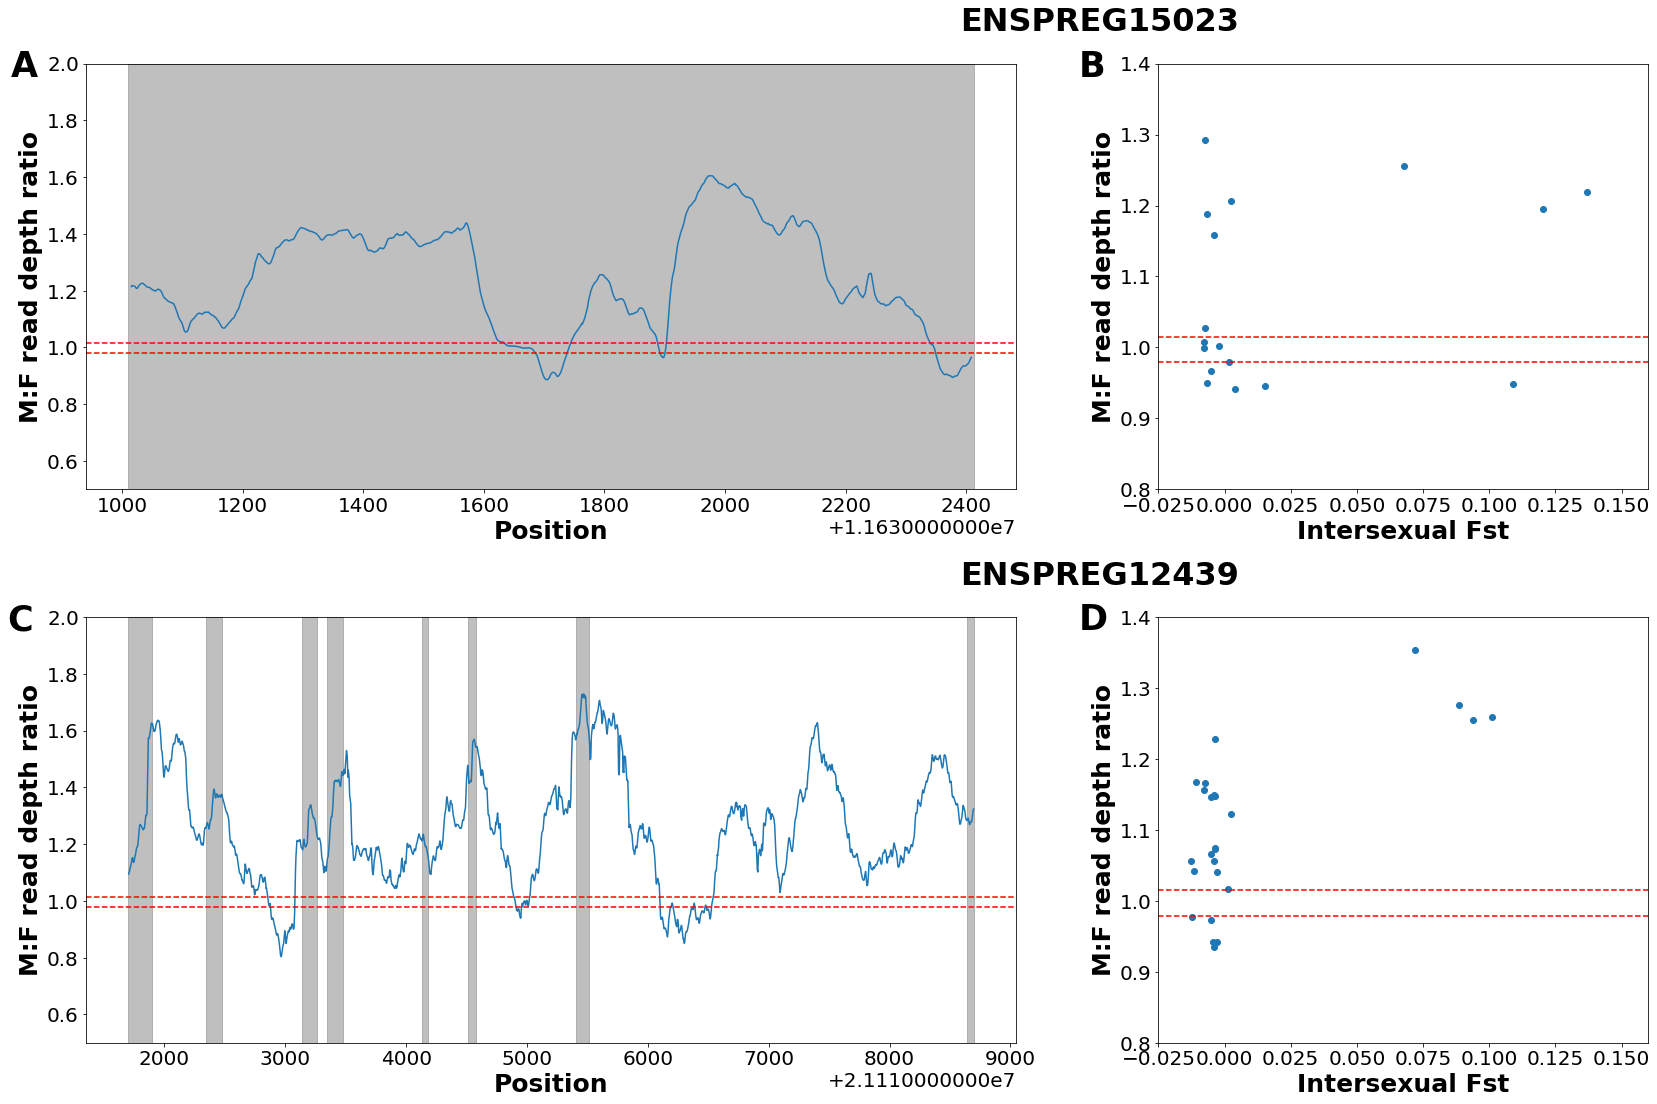

In [598]:
figs, axs = plt.subplots(2,2,gridspec_kw={'width_ratios': [3.8, 2]})

# change the figure size for all subplots
figs.set_figheight(20)
figs.set_figwidth(28)
figs.subplots_adjust(left=0.125,
                    bottom=0.2, hspace=0.3) 

################# fig6 #####################
axs[0,0].plot(df6['Pos'],df6["M:F Depth"]) # moving average
#axs[5,0].set_title('si:rp71-17i16.5')
axs[0,0].set_ylim(0.5,2)
axs[0,0].set_xlabel('Position', fontsize=25,fontweight='bold')
axs[0,0].set_ylabel('M:F read depth ratio', fontsize=25,fontweight='bold')
axs[0,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[0,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts5)-1):
    axs[0,0].axvspan(int(starts5[i]),int(ends5[i]), alpha = 0.5, color= 'grey')
axs[0,0].axvspan(int(starts5[-1]),int(ends5[-1]), alpha = 0.5, color= 'grey')  

################# fig7 #####################
axs[1,0].plot(df7['Pos'],df7["M:F Depth"]) # moving average
#axs[2,0].set_title('si:rp71-17i16.5')
axs[1,0].set_ylim(0.5,2)
axs[1,0].set_xlabel('Position', fontsize=25,fontweight='bold')
axs[1,0].set_ylabel('M:F read depth ratio', fontsize=25,fontweight='bold')
axs[1,0].axhline(y=0.9792993, color='r', linestyle='--')
axs[1,0].axhline(y=1.015249, color='r', linestyle='--')
#axs[0,0].xlabel('Pos')
#axs[0,0].ylabel('M:F read depth ratio')
#axs[0,0].ylim(0,3)
for i in range(len(starts6)):
    axs[1,0].axvspan(int(starts6[i]),int(ends6[i]), alpha = 0.5, color= 'grey')
#axs[6,0].axvspan(int(starts6[-1]),int(ends6[-1]), alpha = 0.5, color= 'grey')  


##################################
########## FST PLOTS #############
##################################


########### Fig 6 ################
fst_df6 = ReadFST('LG18')
axs[0,1].scatter(fst_df6.FST, fst_df6.MF_Depth)
#axs[0,1].set_title('si:rp71-17i16.5')
axs[0,1].set_xlabel('Intersexual Fst', fontsize=25,fontweight='bold')
axs[0,1].set_ylabel('M:F read depth ratio', fontsize=25,fontweight='bold')
axs[0,1].set_ylim(0.8,1.4)
axs[0,1].set_xlim(-0.025,0.16)
axs[0,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[0,1].axhline(y=1.015249, color='r', linestyle='--')
########### Fig 7 ################
fst_df7 = ReadFST('LG22')
axs[1,1].scatter(fst_df7.FST, fst_df7.MF_Depth)
#axs[1,1].set_title('si:rp71-17i16.5')
axs[1,1].set_xlabel('Intersexual Fst', fontsize=25, fontweight='bold')
axs[1,1].set_ylabel('M:F read depth ratio', fontsize=25, fontweight='bold')
axs[1,1].set_ylim(0.8,1.4)
axs[1,1].set_xlim(-0.025,0.16)

axs[1,1].axhline(y=0.9792993, color='r', linestyle='--')
axs[1,1].axhline(y=1.015249, color='r', linestyle='--')


#for ax in axs.flat:
#    ax.set(ylabel='M:F read depth ratio', fontsize=15)
    
# 添加标签


axs[0,0].text(11630815,2.05, "A",fontsize=35, fontweight='bold', va='top')
axs[0,1].text(-0.055,1.42, "B",fontsize=35, fontweight='bold', va='top')
axs[1,0].text(21110699,2.05, "C",fontsize=35, fontweight='bold', va='top')
axs[1,1].text(-0.055,1.42, "D",fontsize=35, fontweight='bold', va='top')
axs[0,1].text(-0.1,1.48, "ENSPREG15023",fontsize=32, fontweight='bold', va='top')
axs[1,1].text(-0.1,1.48, "ENSPREG12439",fontsize=32, fontweight='bold', va='top')

figs.savefig('test_2.pdf')
